In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy

In [2]:
file_source = "data/bike-sharing-demand/"

train = pd.read_csv(file_source + "train.csv", parse_dates = ['datetime'])
test =  pd.read_csv(file_source + "test.csv", parse_dates = ['datetime'])

In [3]:
train.info() #Dtype을 object를 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [5]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

1) Train과 Test 컬럼에 차이가 나타남,   
예측대상의 변수는 Count인데  
Count = Casual + Registered 라는 것을 유추가 가능함  

In [9]:
for col in train.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msperc)
    
#결측치 파악하는 코드, 잊지마라

column:   datetime	 Percent of NaN value: 0.00%
column:     season	 Percent of NaN value: 0.00%
column:    holiday	 Percent of NaN value: 0.00%
column: workingday	 Percent of NaN value: 0.00%
column:    weather	 Percent of NaN value: 0.00%
column:       temp	 Percent of NaN value: 0.00%
column:      atemp	 Percent of NaN value: 0.00%
column:   humidity	 Percent of NaN value: 0.00%
column:  windspeed	 Percent of NaN value: 0.00%
column:     casual	 Percent of NaN value: 0.00%
column: registered	 Percent of NaN value: 0.00%
column:      count	 Percent of NaN value: 0.00%


In [10]:
!pip install missingno

<AxesSubplot:>

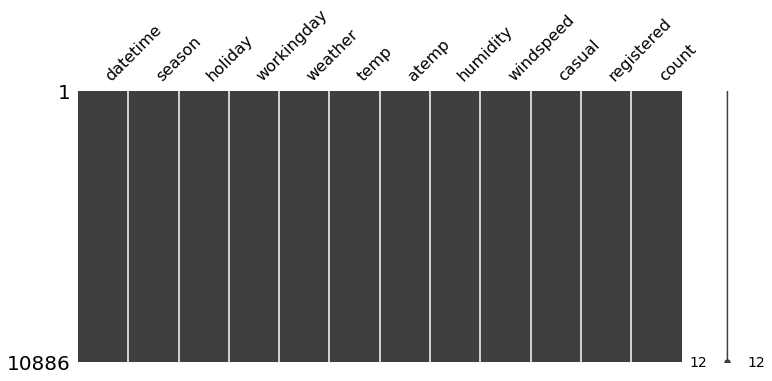

In [11]:
import missingno as msno

msno.matrix(train, figsize=(12,5))
#missing number

C:\Users\qhrrl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.242066
Kurtosis: 1.300093


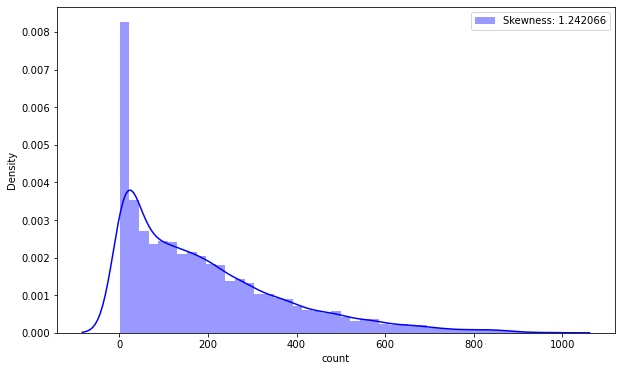

In [12]:
f, ax = plt.subplots(1, 1, figsize = (10, 6))
g = sns.distplot(train['count'], color = 'b', label = 'Skewness: {:2f}'.format(train['count'].skew()), ax=ax)
g = g.legend(loc = 'best')

print("Skewness: %f" % train["count"].skew())
print("Kurtosis: %f" % train["count"].kurt())

#출처: https://hong-yp-ml-records.tistory.com/17?category=823206 [HONG YP's Data Science BLOG:티스토리]

Skewness(비대칭도)란 분포가 얼마나 비대칭을 띄는가 알려주는 척도입니다.  
(비대칭도: a=0이면 정규분포, a<0 이면 오른쪽으로 치우침, a>0이면 왼쪽으로 치우침)  
   
Kurtosis (첨도)란 확률분포의 뾰족한 정도를 나타내는 척도입니다.  
관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용됩니다.  
그래프에 치우침이 보이는 것을 확인할 수 있습니다.   
count 대부분의 데이터가 0에 몰려있는 모습인데요,   
Feature Engineering 단계에서 자세히 알아보도록 하겠습니다.  

# EDA 

In [13]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

In [14]:
train.shape

(10886, 18)

year 별 자전거 수요량 파악

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

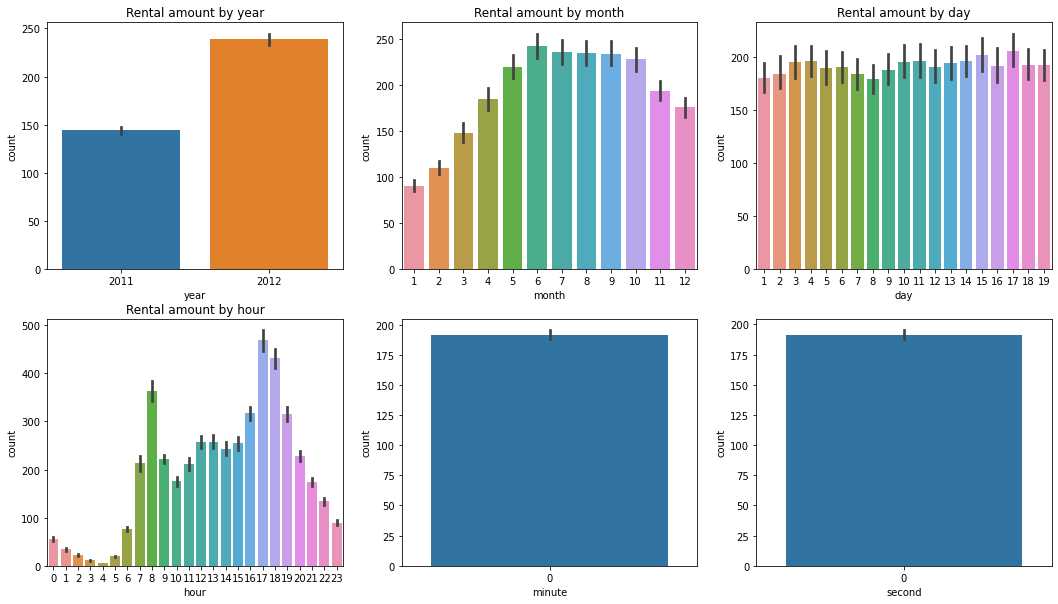

In [15]:
#객체지향방식 사용
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
#2행 3열에 각자 배치
figure.set_size_inches(18,10)

sns.barplot(data=train, x = "year", y = "count", ax = ax1)
sns.barplot(data=train, x = "month", y = "count", ax = ax2)
sns.barplot(data=train, x = "day", y = "count", ax = ax3)
sns.barplot(data=train, x = "hour", y = "count", ax = ax4)
sns.barplot(data=train, x = "minute", y = "count", ax = ax5)
sns.barplot(data=train, x = "second", y = "count", ax = ax6)

ax1.set(ylabel = "count", title = "Rental amount by year")
ax2.set(ylabel = "count", title = "Rental amount by month")
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")

In [16]:
train['dayofweek'] = train['datetime'].dt.dayofweek
test['dayofweek'] = test['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [17]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

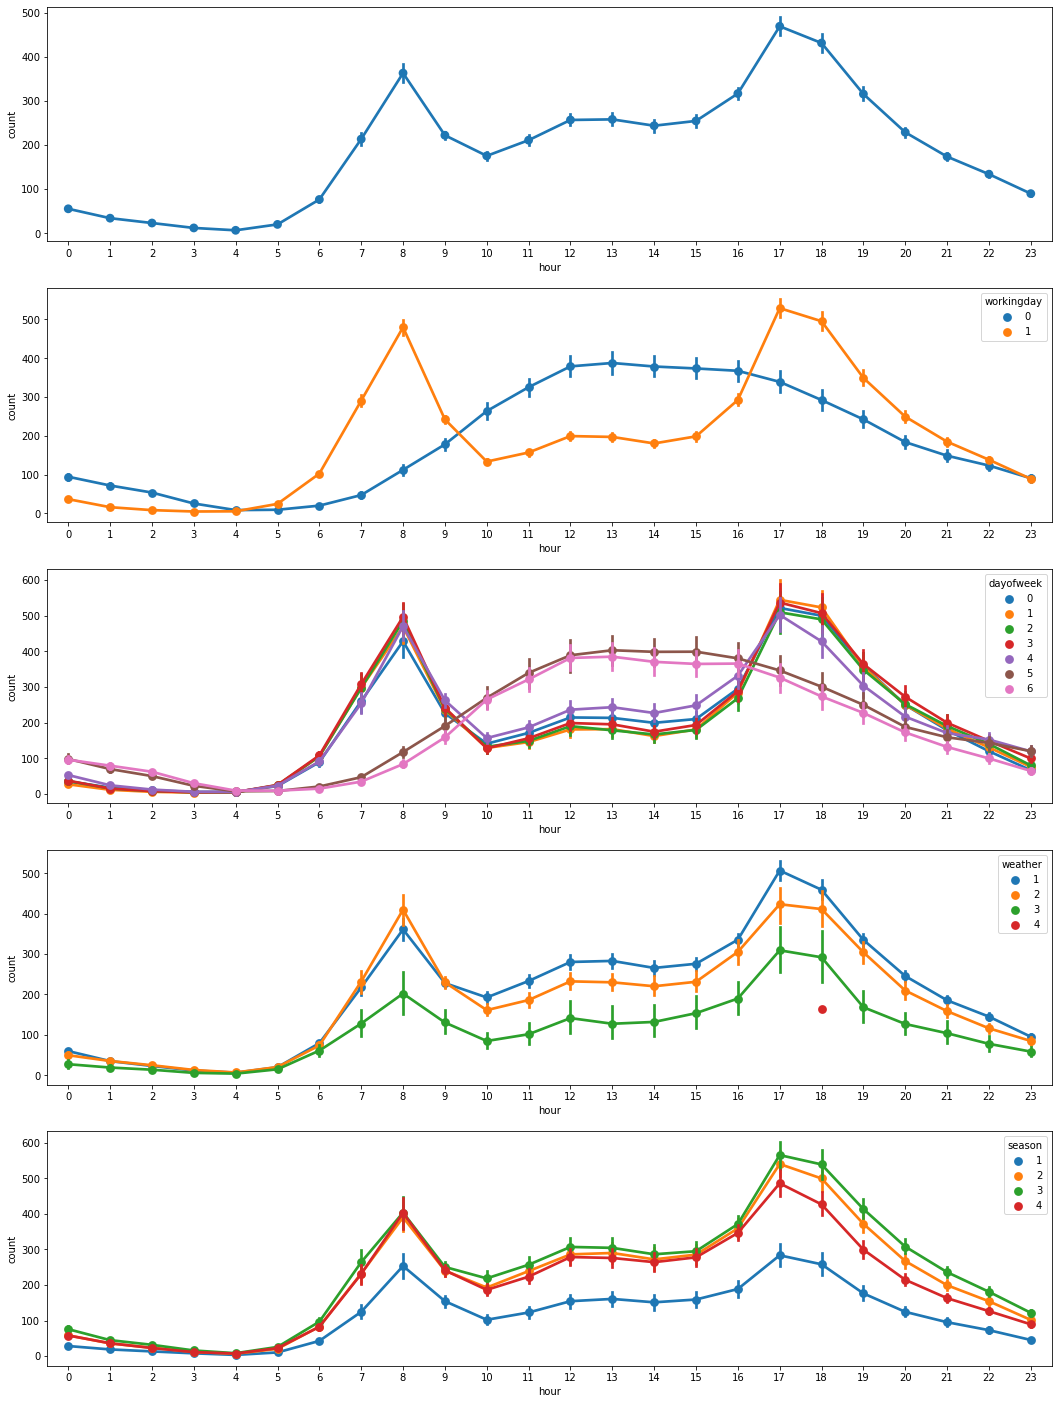

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18, 25)

sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax2)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax3)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax4)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season', ax = ax5)

<AxesSubplot:title={'center':'Correlation of Numeric Features with Rental Count'}>

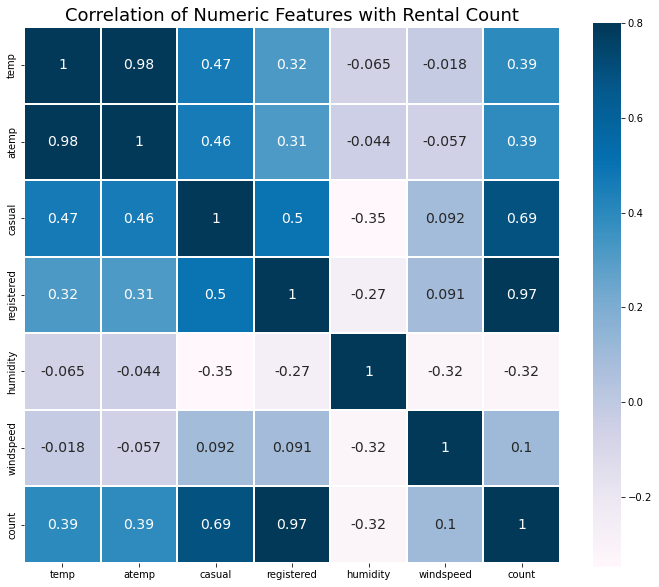

In [19]:
corr_data = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]

colormap = plt.cm.PuBu
 
f , ax = plt.subplots(figsize = (12,10))
plt.title('Correlation of Numeric Features with Rental Count',y=1,size=18)
sns.heatmap(corr_data.corr(), vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",annot_kws = {'size':14})


Corr과 다중공선성을 봐야한다

<AxesSubplot:xlabel='humidity', ylabel='count'>

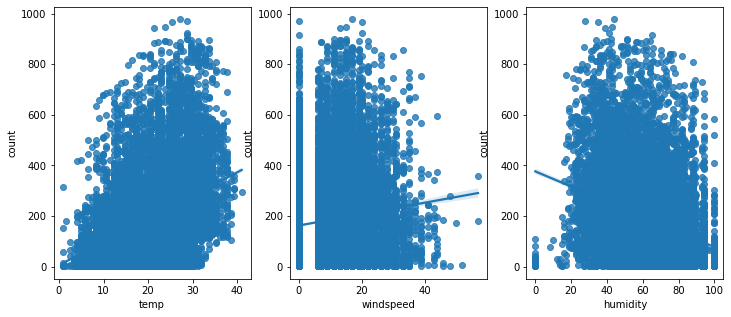

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(12,5))

temp_scatter_plot = pd.concat([train['count'], train['temp']], axis = 1)
sns.regplot(x = 'temp', y = 'count', data = temp_scatter_plot, scatter = True, fit_reg = True, ax = ax1)

windspeed_scatter_plot = pd.concat([train['count'], train['windspeed']], axis = 1)
sns.regplot(x = 'windspeed', y = 'count', data = windspeed_scatter_plot, scatter = True, fit_reg = True, ax = ax2)

humidity_scatter_plot = pd.concat([train['count'], train['humidity']], axis = 1)
sns.regplot(x = 'humidity', y = 'count', data = humidity_scatter_plot, scatter = True, fit_reg = True, ax = ax3)

산점도 그림을 보니 windspeed에 0값이 너무 많은것을 확인

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

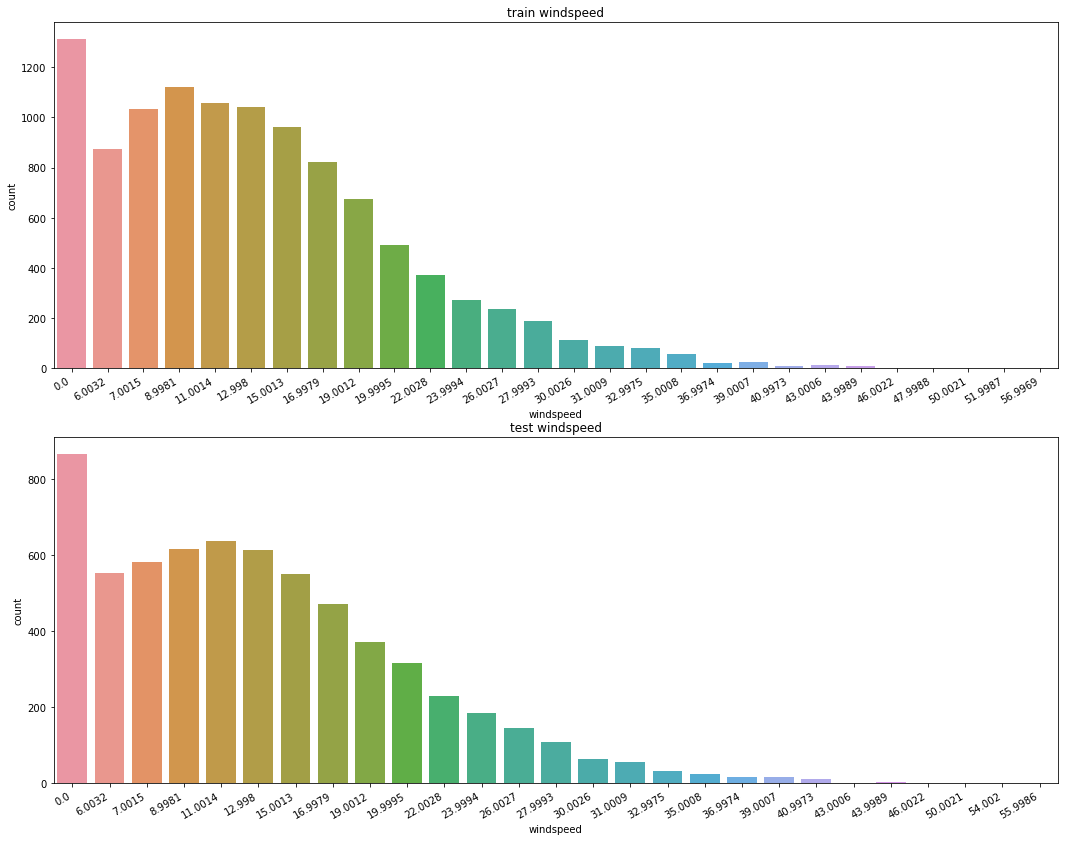

In [22]:
fig, axes = plt.subplots(nrows = 2, figsize = (18, 14))

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = 'right')
axes[0].set(ylabel = "count", title = 'train windspeed')
sns.countplot(data = train, x = 'windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30, ha = 'right')
axes[1].set(ylabel = "count", title = 'test windspeed')
sns.countplot(data = test, x = 'windspeed', ax = axes[1])

train / test 데이터 속 windspeed 값에서 0이 너무 많음을 확인

In [23]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)
test['year_month'] = test['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime','year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

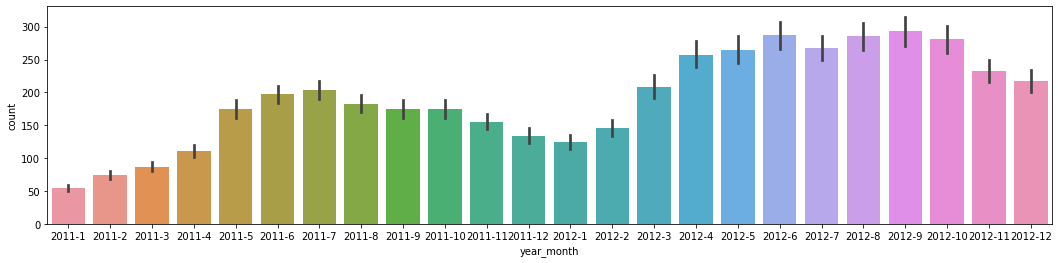

In [24]:
fig, ax = plt.subplots(figsize= (18, 4))
sns.barplot(data = train, y = 'count', x = 'year_month')

11년에 비해 12년의 대여량이 높아졌는데

In [28]:
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

Outliers_to_drop = detect_outliers(train, 2, ['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count'])

In [29]:
train.loc[Outliers_to_drop]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,0,2,2012-3
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,19,18,0,0,0,2012-3
6825,2012-04-02 17:00:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729,2012,4,2,17,0,0,0,2012-4
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012,4,3,17,0,0,1,2012-4
6850,2012-04-03 18:00:00,2,0,1,1,24.60,30.305,26,11.0014,139,661,800,2012,4,3,18,0,0,1,2012-4
6897,2012-04-05 17:00:00,2,0,1,1,20.50,24.240,31,11.0014,145,677,822,2012,4,5,17,0,0,3,2012-4
7088,2012-04-13 17:00:00,2,0,1,1,22.96,26.515,24,11.0014,117,621,738,2012,4,13,17,0,0,4,2012-4
7640,2012-05-17 17:00:00,2,0,1,1,27.06,31.060,31,8.9981,133,719,852,2012,5,17,17,0,0,3,2012-5
7641,2012-05-17 18:00:00,2,0,1,1,27.06,31.060,27,11.0014,134,734,868,2012,5,17,18,0,0,3,2012-5
7664,2012-05-18 17:00:00,2,0,1,1,27.06,31.060,34,8.9981,124,688,812,2012,5,18,17,0,0,4,2012-5


In [30]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

train.shape

(10846, 20)